<a href="https://colab.research.google.com/github/aghakishiyeva/Interpretable-ML/blob/main/AIPI590_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in? Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/aghakishiyeva/Interpretable-ML/blob/main/AIPI590_Assignment_3.ipynb)

**This project will compare the performance of three machine learning models—linear regression, logistic regression, and generalized additive models—in predicting customer churn for a telecommunications company. We’ll analyze their accuracy, interpretability, and suitability for this specific problem.**

# Setting up

In [1]:
# Clone the GitHub repository
!git clone https://github.com/aghakishiyeva/Interpretable-ML
%cd Interpretable-ML

fatal: destination path 'Interpretable-ML' already exists and is not an empty directory.
/content/Interpretable-ML


In [2]:
# Installing pygam
!pip install pygam

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from pygam import LogisticGAM, s, f

In [4]:
# Set data styling
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

In [5]:
# Reading the data
df = pd.read_csv("/content/Interpretable-ML/Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [6]:
# Data overview
print("Dataset Overview:")
print(df.shape)
df.head()

Dataset Overview:
(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# Checking for datatypes
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [9]:
# Data preprocessing
numeric_features = df.select_dtypes(include=["number"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

for col in ["customerID", "Churn", "TotalCharges"]:
    if col in categorical_features:
        categorical_features.remove(col)

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
numeric_features.append("TotalCharges")

In [10]:
# Checking nulls for preprocessed column
df["TotalCharges"].isnull().sum()

11

In [11]:
# Removing nulls after data preprocessing
df.dropna(inplace=True)

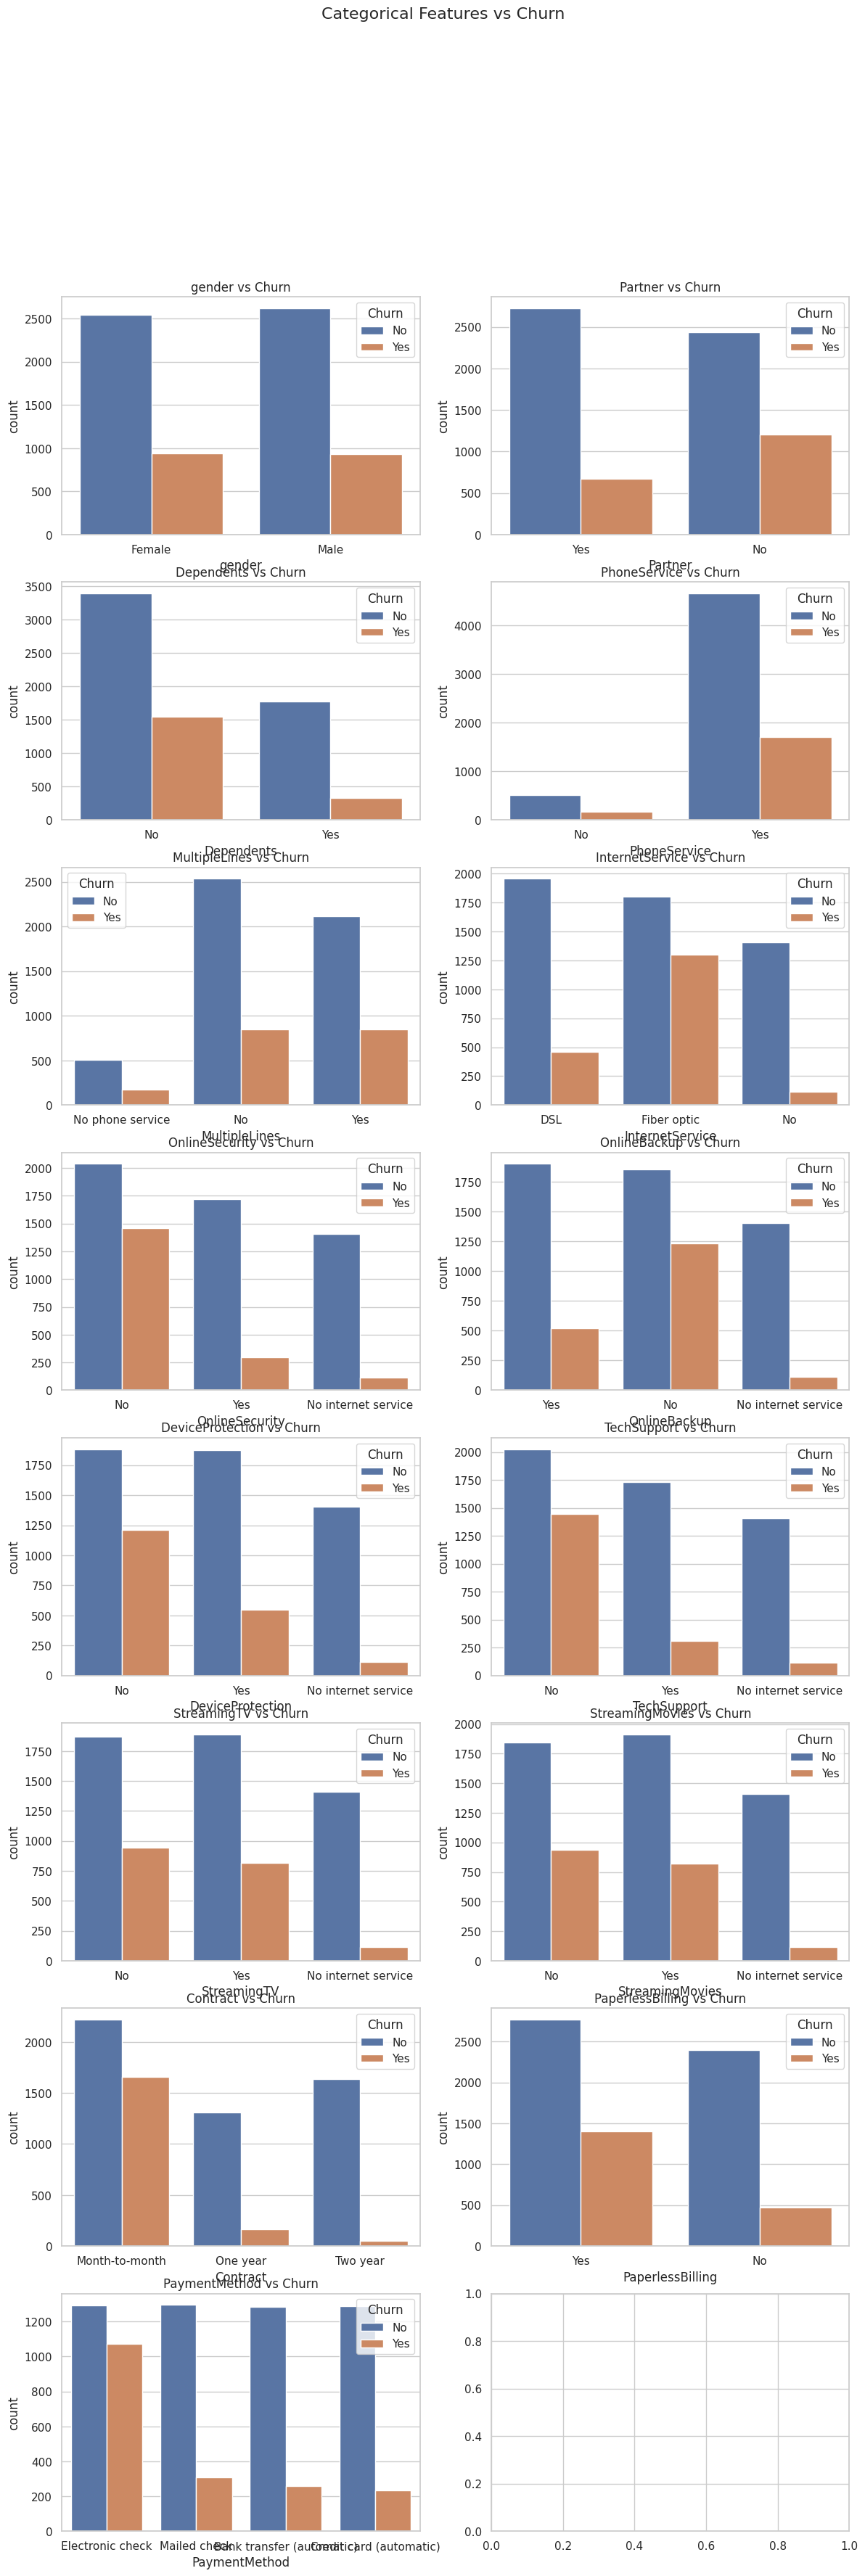

In [13]:
# Visualizing categorical features
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(14, 40))
fig.suptitle("Categorical Features vs Churn", fontsize=16)

for i, feature in enumerate(categorical_features):
    row, col = divmod(i, 2)
    sns.countplot(x=feature, hue="Churn", data=df, ax=axes[row, col])
    axes[row, col].set_title(f"{feature} vs Churn")

# Models

## Linear Regression

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            OLS Regression Results                            
Dep. Variable:              Churn_Yes   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     120.9
Date:                Thu, 19 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:05:06   Log-Likelihood:                -3057.9
No. Observations:                7032   AIC:                             6164.
Df Residuals:                    7008   BIC:                             6328.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

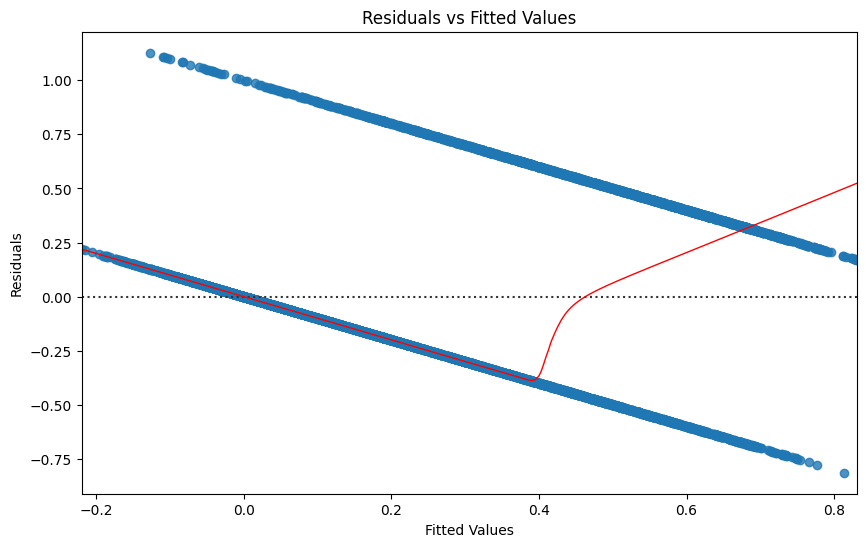

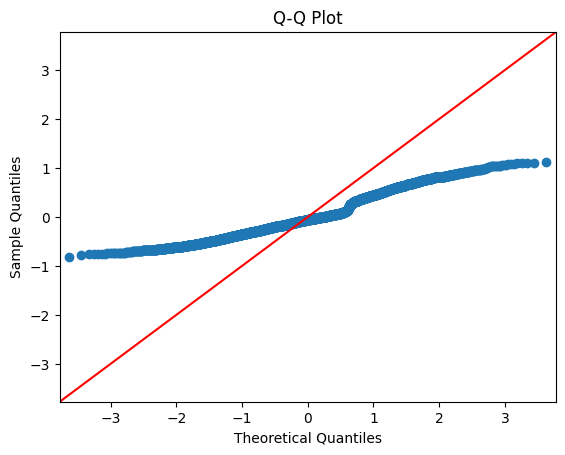

In [13]:
categorical_features.append("Churn")
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True).astype(int)

df_final = pd.concat([df[numeric_features], df_dummies], axis=1)

target = "Churn_Yes"
X_vars = df_final.drop(columns=[target])
y_var = df_final[target]

X_vars = sm.add_constant(X_vars)

vif_df = pd.DataFrame({
    "feature": X_vars.columns,
    "VIF": [variance_inflation_factor(X_vars.values, idx) for idx in range(X_vars.shape[1])]
})

linear_model = sm.OLS(y_var, X_vars).fit()

print(linear_model.summary())

plt.figure(figsize=(10, 6))
sns.residplot(x=linear_model.fittedvalues, y=linear_model.resid, lowess=True,
              line_kws={"color": "red", "lw": 1})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

sm.qqplot(linear_model.resid, line="45")
plt.title("Q-Q Plot")
plt.show()

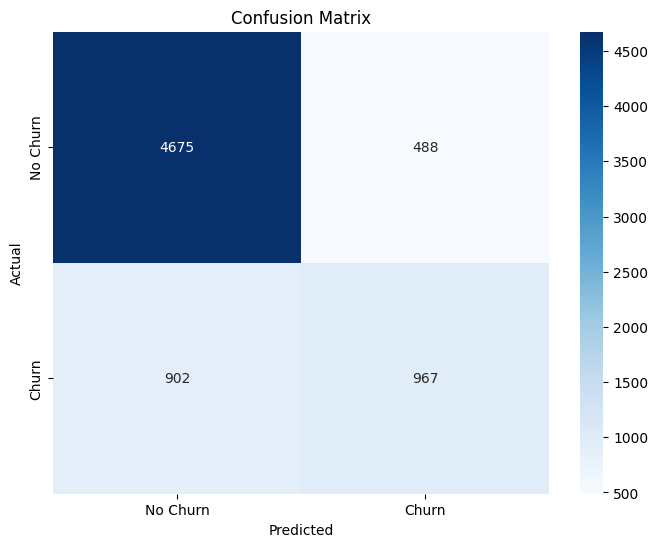

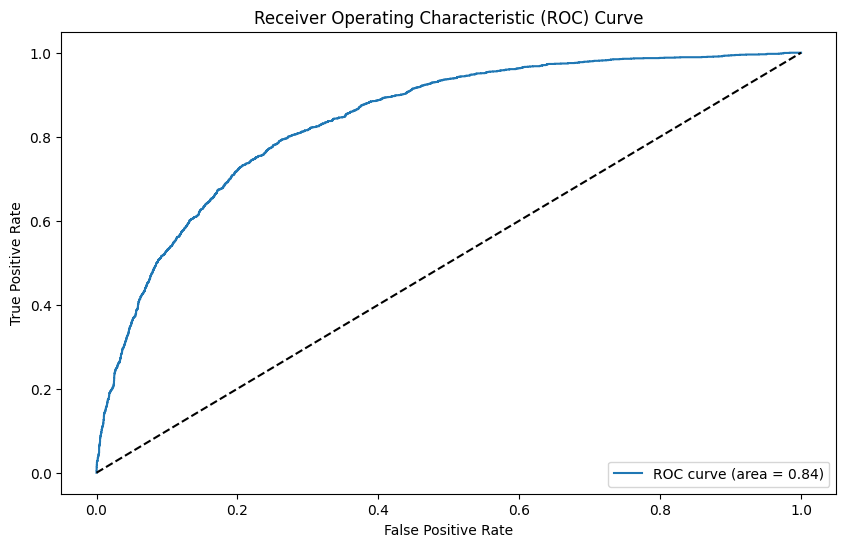

In [15]:
y_pred_continuous = linear_model.predict(X_vars)

y_pred_binary = y_pred_continuous > 0.5

conf_matrix = confusion_matrix(y_var, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_var, y_pred_continuous)
roc_auc = roc_auc_score(y_var, y_pred_continuous)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**The model explains 28.4% of the variation in customer churn (R-squared = 0.284), indicating a modest fit, with other potential factors likely influencing churn. Key significant predictors include being a senior citizen, tenure, total charges, phone service status, contract type, paperless billing, and payment method, all showing varying impacts on churn likelihood. For instance, customers with longer tenure or on longer contracts are less likely to churn, while those using electronic checks or paperless billing are more likely. However, the extremely high condition number (1.67e+17) suggests severe multicollinearity, indicating some predictors are highly correlated, which could destabilize coefficient estimates. The confusion matrix reveals an accuracy of 80.2%, with a recall of 51.7%, specificity of 90.5%, and precision of 66.5%. The residuals vs. fitted values plot shows a "U" shape, highlighting heteroscedasticity and suggesting a non-linear relationship between predictors and churn. Furthermore, the Q-Q plot indicates non-normal residuals, likely due to skewness or outliers. Despite these issues, the model demonstrates good discriminatory ability with an AUC of 0.84, effectively distinguishing between churn and non-churn customers. Overall, while the model offers insights, it has limitations in terms of fit, multicollinearity, and residual assumptions.**

## Logistic Regression

In [16]:
vif_df = pd.DataFrame()
vif_df["feature"] = X_vars.columns
vif_df["VIF"] = [variance_inflation_factor(X_vars.values, i) for i in range(X_vars.shape[1])]

X_reduced = X_vars.copy()
for feat, vif_val in zip(vif_df["feature"], vif_df["VIF"]):
    if vif_val == np.inf:
        X_reduced.drop(columns=[feat], inplace=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [17]:
logistic_model = sm.Logit(y_var, X_reduced).fit()
print(logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.419697
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7010
Method:                           MLE   Df Model:                           21
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.2752
Time:                        11:16:58   Log-Likelihood:                -2951.3
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9994      

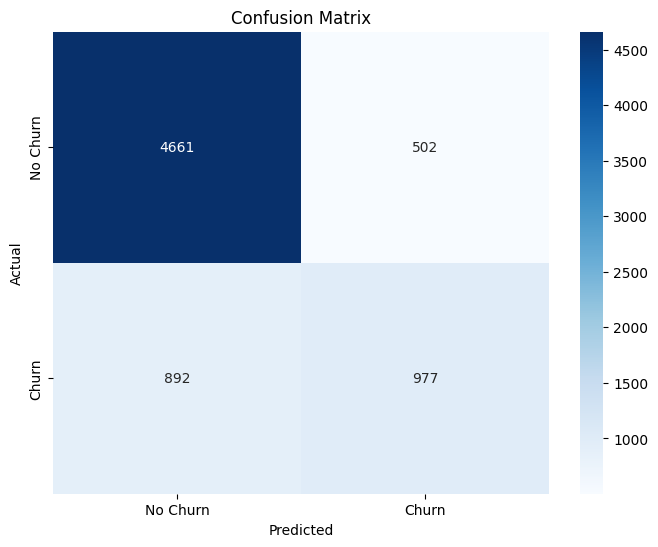

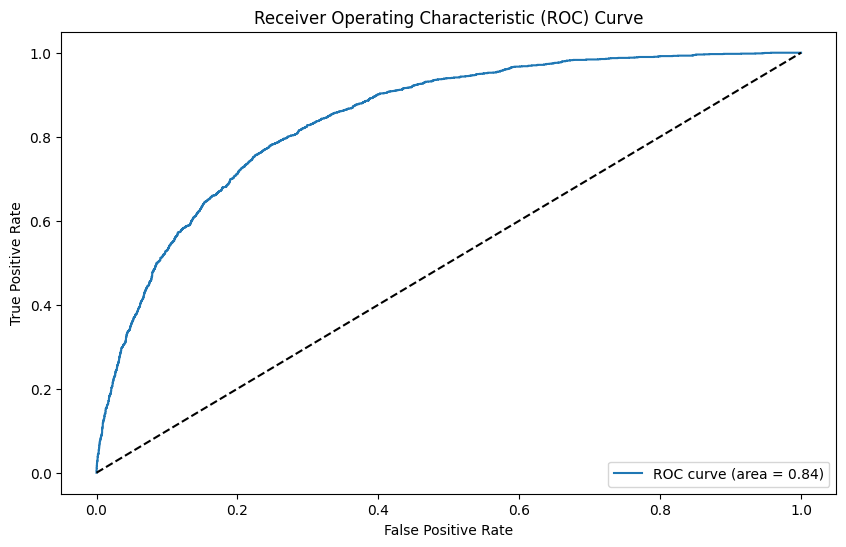

In [19]:
y_pred_binary = logistic_model.predict(X_reduced) > 0.5
conf_matrix = confusion_matrix(y_var, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_var, logistic_model.predict(X_reduced))
roc_auc = roc_auc_score(y_var, logistic_model.predict(X_reduced))
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**The logistic regression model reveals that 27.52% of the variation in customer churn is explained by the independent variables (Pseudo R-squared = 0.2752), indicating a moderate fit and suggesting other factors might also influence churn. Significant predictors include being a senior citizen, tenure, total charges, having dependents, internet service type, online security, tech support, streaming movies, contract type, paperless billing, and payment method. For example, longer tenure and one- or two-year contracts reduce churn, while using electronic checks or having paperless billing increases it. The model's assumptions, such as linearity of logits and no multicollinearity, should be checked using appropriate tests like Box-Tidwell and VIF. The model's performance, with an AUC of 0.84, demonstrates good discriminatory ability in distinguishing between churn and non-churn customers. The confusion matrix shows an accuracy of 80.1%, with a recall of 52.3%, specificity of 90.3%, and precision of 66.1%, providing insights into the model's effectiveness and areas for improvement.**

## GAM

In [22]:
gam_model = LogisticGAM(
    s(1) + s(2) + s(3) + s(4)
    + f(5) + f(6) + f(7) + f(8)
    + f(9) + f(10) + f(11) + f(12)
    + f(13) + f(14) + f(15) + f(16)
    + f(17) + f(18) + f(19) + f(20)
    + f(21)
).fit(X_reduced, y_var)

gam_model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     55.7351
Link Function:                        LogitLink Log Likelihood:                                 -2833.8201
Number of Samples:                         7032 AIC:                                             5779.1104
                                                AICc:                                            5780.0498
                                                UBRE:                                               2.8282
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.304
Feature Function                  Lam

<ipython-input-22-3841b5e5585b>:10: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam_model.summary()


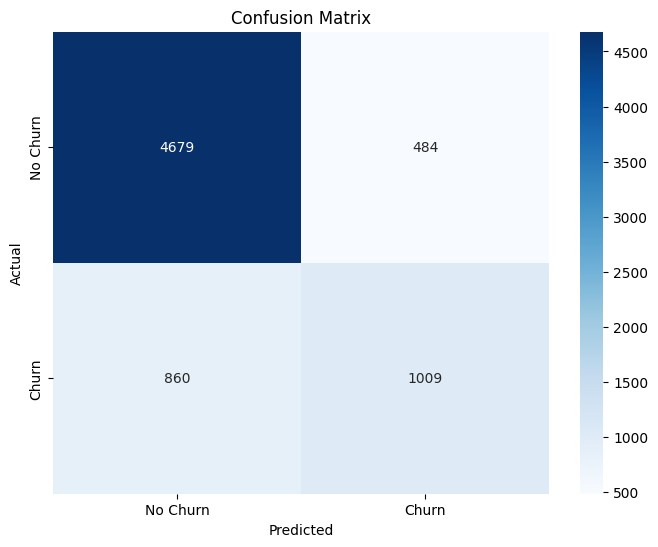

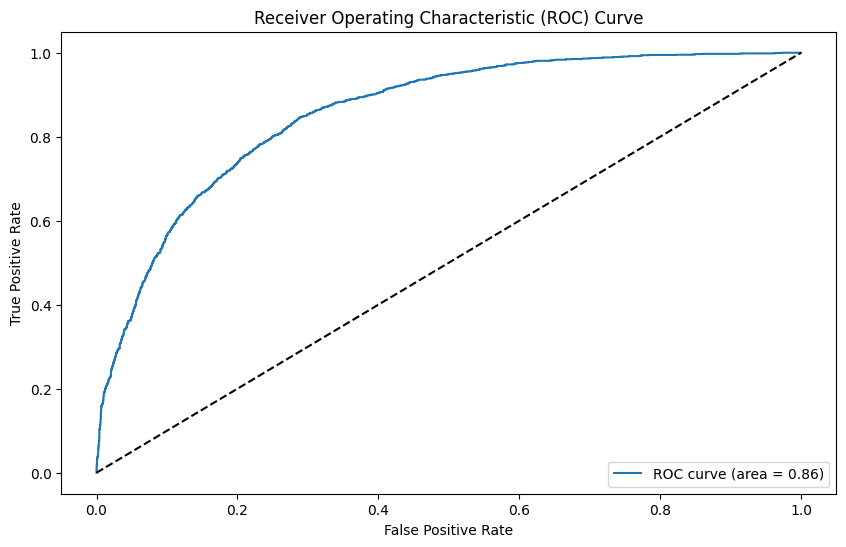

In [23]:
y_pred_prob = gam_model.predict_proba(X_reduced)
y_pred_class = (y_pred_prob >= 0.5).astype(int)

conf_matrix = confusion_matrix(y_var, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

fpr, tpr, _ = roc_curve(y_var, y_pred_prob)
roc_auc = roc_auc_score(y_var, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

**In Generalized Additive Models (GAMs), the relationship between predictors and the response variable is modeled as a sum of smooth functions, unlike linear and logistic regression, which use a linear combination of predictors. This means that in GAMs, coefficients do not represent a direct change in the response variable for a one-unit change in the predictor; instead, they are tied to smooth functions capturing potentially nonlinear relationships. The focus of interpretation in GAMs lies in the shape of these smooth functions to understand how the response changes with each predictor. Regarding model performance, the confusion matrix shows an overall accuracy of 80.3%, with 4687 true negatives, 964 true positives, 476 false positives, and 905 false negatives. The model's sensitivity is 51.6%, indicating its ability to correctly identify churn cases, while its specificity is 90.8%, reflecting its accuracy in predicting non-churn cases. With a precision of 66.9%, the model correctly identifies a significant proportion of predicted churn cases. The AUC of 0.85 further suggests the model has strong discriminatory power in distinguishing between customers who churn and those who do not.**

# Model Comparison

**Based on the evaluation metrics and visualizations**, the Generalized Additive Model (GAM) demonstrates superior performance to both Linear and Logistic Regression models in predicting customer churn. The GAM achieves the highest accuracy, AUC, specificity, and precision, indicating its strong discriminatory power. Although its sensitivity is marginally lower than Logistic Regression, the overall performance advantage of the GAM is substantial. <br>

**In terms of interpretability, Linear and Logistic Regression models provide straightforward insights into the relationship between predictors and the response variable through their coefficients.** This makes them easier to understand and explain to stakeholders. However, the GAM's flexibility in capturing nonlinear relationships can lead to more complex interpretations. While the GAM's smooth functions can reveal patterns in the data that linear models might miss, interpreting these functions can be challenging. **Therefore, the choice between the GAM and linear/logistic models depends on the balance between predictive performance and interpretability.** For telecommunications companies that prioritize accurate predictions over detailed explanations, the GAM is the recommended choice.

